In [251]:
# Image segmentation using k-means clusters in a .ipynb file
# Coursera Project Network mini-course: Image Segmentation with Python and Unsupervised Learning 

In [252]:
#import libraries
#import numpy as np
import cv2
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D # mplot3d toolkit adds 3D plotting capabilities to Matplotlib 

In [253]:
img = cv2.imread("butterfly.jpg")

print(type(img))

print(np.shape(img))
print(img[25,10])

<class 'numpy.ndarray'>
(425, 640, 3)
[10 48 50]


In [254]:
#cv2.imshow("frame1",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

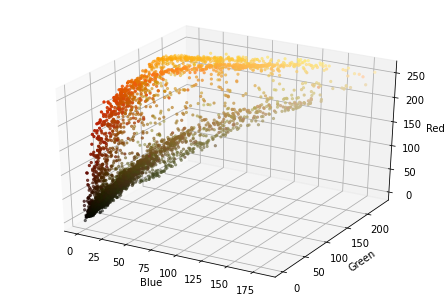

In [255]:
#Flatten the image and 3D color space
flat =np.reshape(img,(-1,3))

#Clusters identified by the K-means algorithm will depend on the initial random labeling of the data. 

idx = np.random.choice(flat.shape[0],5000)
sampled_flat = flat[idx]

#Define a 3D scatter plot
colors = sampled_flat[:,[2,1,0]]/255.0  # normalize values
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(sampled_flat[:,0],sampled_flat[:,1],sampled_flat[:,2],c=colors,marker=".")

ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
plt.show()
plt.clf()
plt.close()

In [256]:
# Using K-means function:
# returns sum of square differences= ssd, this measure is used objectively to judge the compactness of the clusters.  
# returns bestlabels
# returns centers array = The first dimension is the number of centers(K). Second dimension is the three colour components.

# K=number of color segmentations
K=4

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,250,1.0)
ssd, bestLabels, centers = cv2.kmeans(data = flat.astype(np.float32),K=K, bestLabels = None, criteria = criteria,attempts=12, flags = cv2.KMEANS_RANDOM_CENTERS)

#print(bestLabels)
#print(np.shape(centers))
#print("ssd=",ssd)

(10, 3)


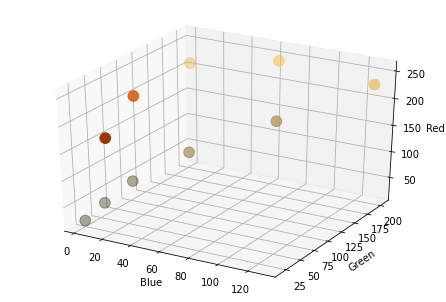

In [257]:
#Plotting cluster centers in RGB space
#s = size of dots

colors = centers[:,[2,1,0]]/255.0  # Divide by 255.0 to normalize values so that RGBA values are within 0 to 1 range. 
#print(colors)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c=colors,marker=".",s=456)

ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")

plt.show()
plt.clf()
plt.close()

In [258]:
# Plot a segmented image
# plot center values as unsigned 8-bit integers

centers = centers.astype(np.uint8)
#print(centers)
#print(bestLabels)

segmented_flat = centers[bestLabels]
segmented_image = segmented_flat.reshape(img.shape)

cv2.imshow("frame1",segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 20 156 243]
 [ 19  60  79]
 [  6  94 211]
 [ 42  99 122]
 [  3  54 156]
 [  8  37  47]
 [ 84 145 173]
 [ 68 189 251]
 [  2  19  22]
 [128 202 228]]
[[5]
 [5]
 [5]
 ...
 [8]
 [8]
 [8]]


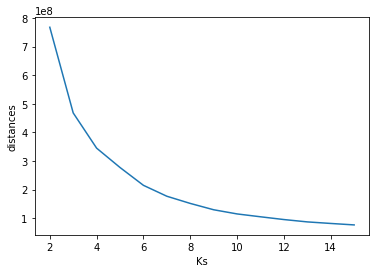

In [259]:
# Optimize K:
# Use the Elbow method to visually inspect the cluster distances verse K in a graph.
# The elbow of the curve is the point of diminished returns where any further increase in K does not yield 
# a significant reduction in the point-to-center distances.

#Declare empty arrays
Ks=[]
distances=[]

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,250,1.0)

for K in range(2,16):
   ssd, bestLabels, centers = cv2.kmeans(data = flat.astype(np.float32),K=K, bestLabels = None, criteria = criteria,attempts=12, flags = cv2.KMEANS_RANDOM_CENTERS)
   Ks.append(K)
   distances.append(ssd)

plt.xlabel("Ks")
plt.ylabel("distances")
plt.plot(Ks,distances)